In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


Availabe events in OpenCV

In [3]:
events =[i for i in dir(cv2) if "EVENT" in i]
events

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [6]:

def draw_circle(event,x,y,flags,param):
    if event== cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),20,(150,0,200),-1)

img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while True : 
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0XFF==27 : # assci code for ESC
        break
cv2.destroyAllWindows()
    

 # Drawing 

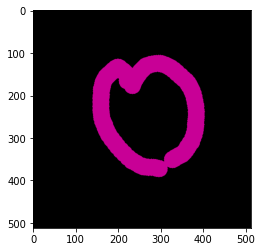

In [14]:
drawing=False # true if mouse is pressed

def brush(event,x,y,flags,param):
    global drawing
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
    elif  event==cv2.EVENT_MOUSEMOVE:
            if drawing==True : 
                     cv2.circle(img,(x,y),20,(150,0,200),-1)
    elif event ==cv2.EVENT_LBUTTONUP:
        drawing=False
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)
while True : 
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0XFF==27 : # assci code for ESC
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])


# Drawing with mouse and changing the color with keyboard

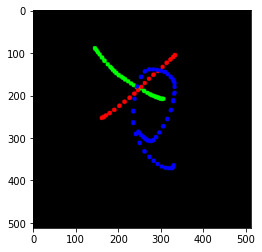

In [15]:
import matplotlib.pyplot as plt

import numpy as np
import cv2 

drawing = False # true if mouse is pressed
color = (0,255,0)
# mouse callback function
def brush(event,x,y,flags,param):
    global drawing, color
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),5,color,-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('b'):
        color = (255,0,0)
    elif k==ord('g'):
        color = (0,255,0)
    elif k==ord('r'):
        color = (0,0,255)
    elif k == 27:
        break
cv2.destroyAllWindows()

plt.imshow(img[...,::-1])

# Drawing a rectangle on the image with mouse 

[[(397, 224), (605, 413)]]


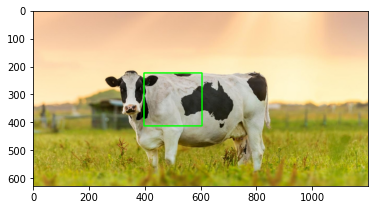

In [8]:
# import the necessary packages
import cv2

# now let's initialize the list of reference point
start_point = (0,0)
points = []
drawing= False

def annotate_image(event, x, y, flags, param):
    # grab references to the global variables
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True 
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv2.rectangle(temp_image, start_point, (x, y), (120,255,0), 2)
            cv2.imshow("image", temp_image)
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        points.append([start_point , (x, y)])

        # draw a rectangle around the region of interest
        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 3)
        cv2.imshow("image", image)
        drawing = False

        
# load the image, clone it, and setup the mouse callback function
image = cv2.imread('images/Cow.jpg')
clone = image.copy()
temp_image = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", annotate_image)

while True:
    # display the image and wait for a keypress
    if drawing == False:
        cv2.imshow("image", image)
    key = cv2.waitKey(5) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []

    # if the 'c' key is pressed, break from the loop
    elif key == 27:
        break

# close all open windows
cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)